In [1]:
import bn
import ocr_data
import numpy as np
from IPython.display import clear_output

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10,7]
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['font.size'] = 19
matplotlib.rcParams['font.family'] = 'DejaVu Serif'
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams['errorbar.capsize'] = 3

In [3]:
hidden_layers = 0
hidden_size = 100
in_size = ocr_data.in_size
out_size = ocr_data.out_size

In [4]:
s = bn.System()
input_neurons = [s.add_neuron(input=True) for i in range(in_size)]
hidden_neurons = []
output_neurons = [s.add_neuron(output=True) for i in range(out_size)]
last_layer = input_neurons
for i_hidden in range(hidden_layers):
    hidden_layer = [s.add_neuron() for i_inner in range(hidden_size)]
    hidden_neurons.append(hidden_layer)
    for neuron in hidden_layer:
        for last_neuron in last_layer:
            neuron.add_input(last_neuron)
    last_layer = hidden_layer
for neuron in output_neurons:
    for last_neuron in last_layer:
        neuron.add_input(last_neuron)
s.finalize()

In [5]:
print('IN: %i OUT: %i TOTAL: %i'%(in_size,out_size,len(s.neurons)))

IN: 64 OUT: 25 TOTAL: 89


In [6]:
def batch(length=10):
    cases = []
    successes = []
    for true_out,input in ocr_data.tagged_data(length):
        guess_out,state = s.guess(input,return_state=True)
        if np.any(guess_out != true_out):
            successes.append(False)
            s.learn(state,true_out,scale=0.25)
        else:
            successes.append(True)
    return cases,successes

In [9]:
while True:
    batch_size = 1000
    cases,successes = batch(batch_size)
    correct = np.count_nonzero(successes)
    print('batch accuracy',correct,'/',len(successes))
    if correct/len(successes) > 0.99:
        break

batch accuracy 983 / 1000
batch accuracy 974 / 1000
batch accuracy 985 / 1000
batch accuracy 967 / 1000
batch accuracy 968 / 1000
batch accuracy 972 / 1000
batch accuracy 963 / 1000
batch accuracy 964 / 1000
batch accuracy 979 / 1000
batch accuracy 964 / 1000
batch accuracy 987 / 1000
batch accuracy 970 / 1000
batch accuracy 975 / 1000
batch accuracy 986 / 1000
batch accuracy 983 / 1000
batch accuracy 980 / 1000
batch accuracy 982 / 1000
batch accuracy 975 / 1000
batch accuracy 958 / 1000
batch accuracy 976 / 1000
batch accuracy 978 / 1000
batch accuracy 975 / 1000
batch accuracy 972 / 1000
batch accuracy 980 / 1000
batch accuracy 983 / 1000
batch accuracy 971 / 1000
batch accuracy 985 / 1000
batch accuracy 971 / 1000
batch accuracy 960 / 1000
batch accuracy 968 / 1000
batch accuracy 977 / 1000
batch accuracy 986 / 1000
batch accuracy 983 / 1000
batch accuracy 983 / 1000
batch accuracy 982 / 1000
batch accuracy 965 / 1000
batch accuracy 963 / 1000
batch accuracy 982 / 1000
batch accura

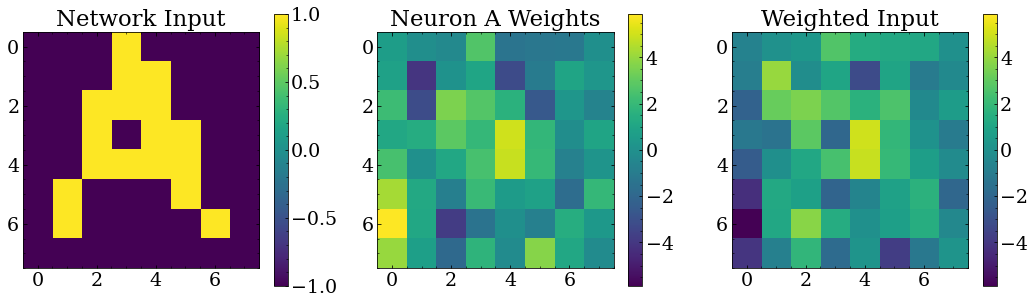

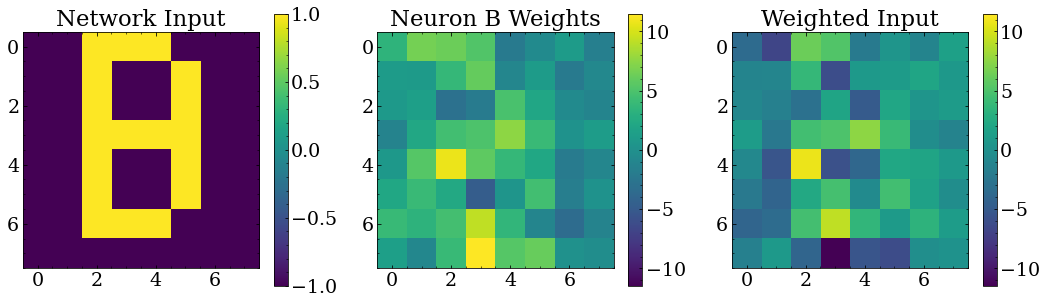

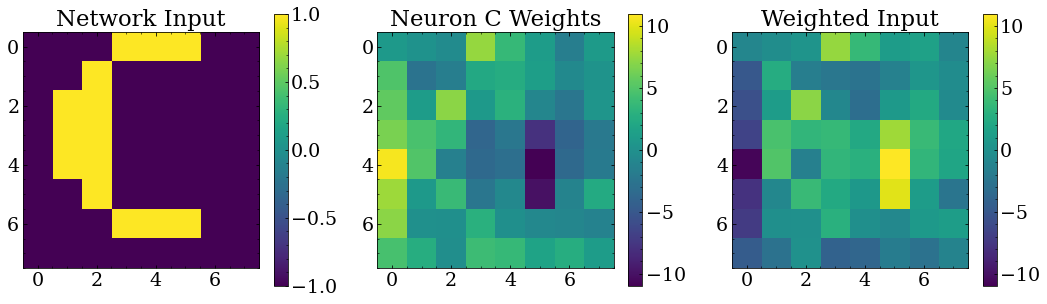

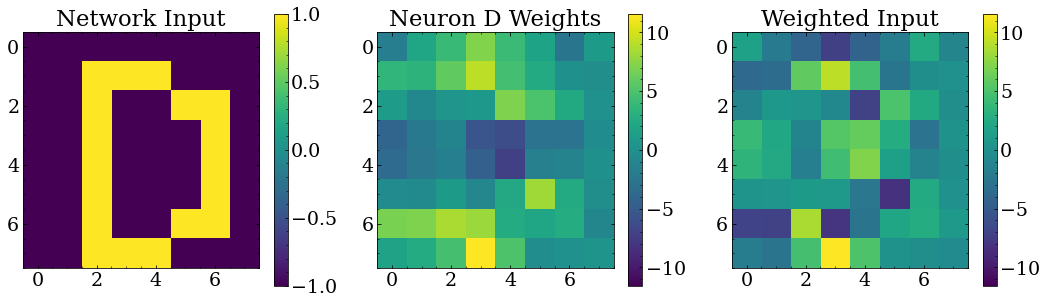

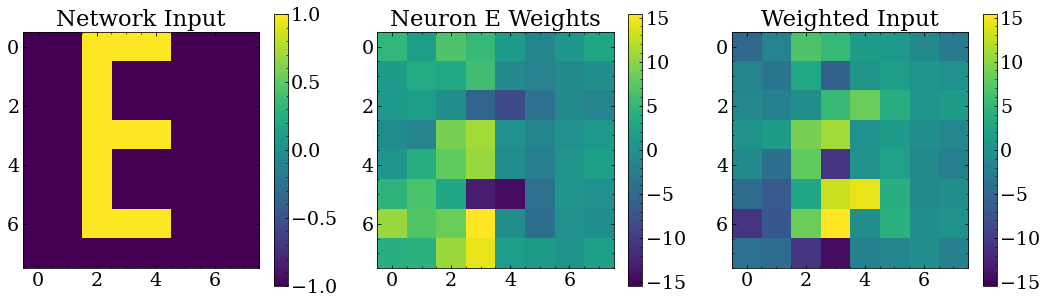

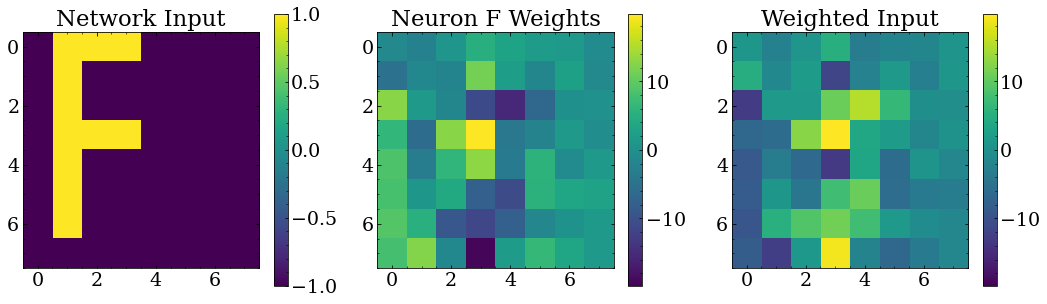

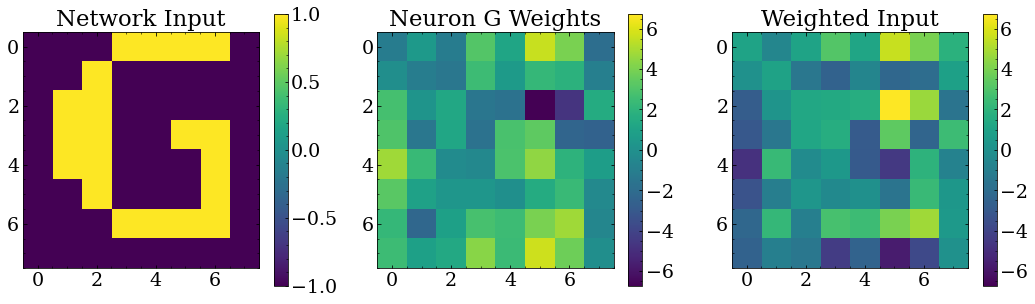

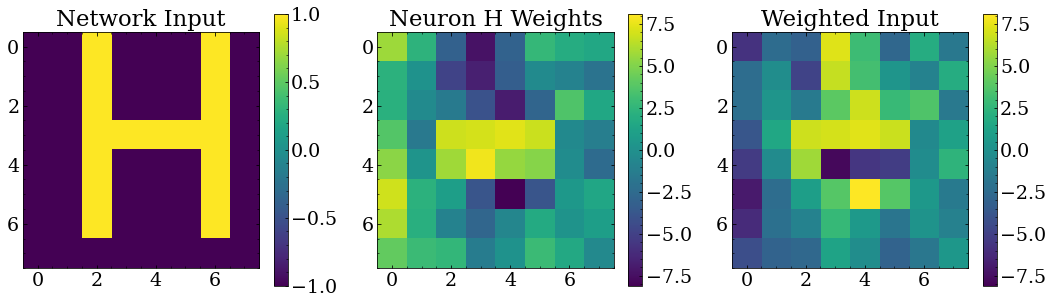

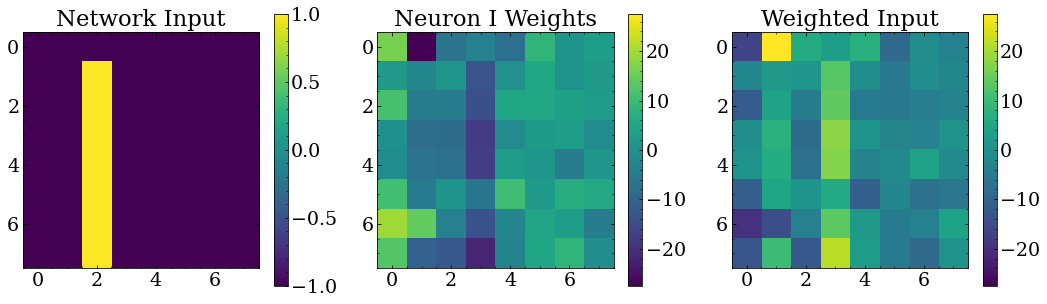

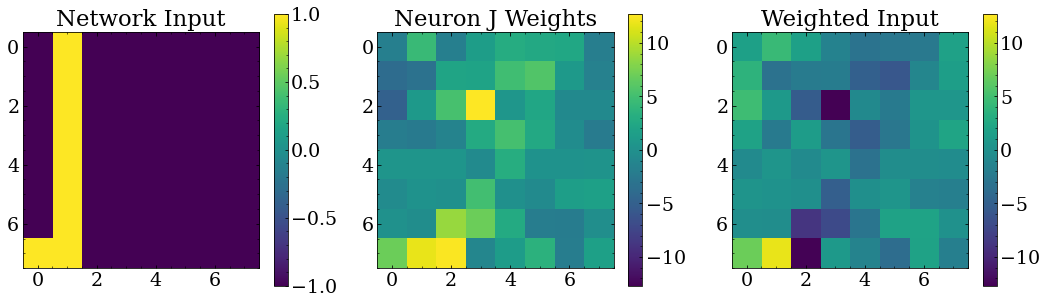

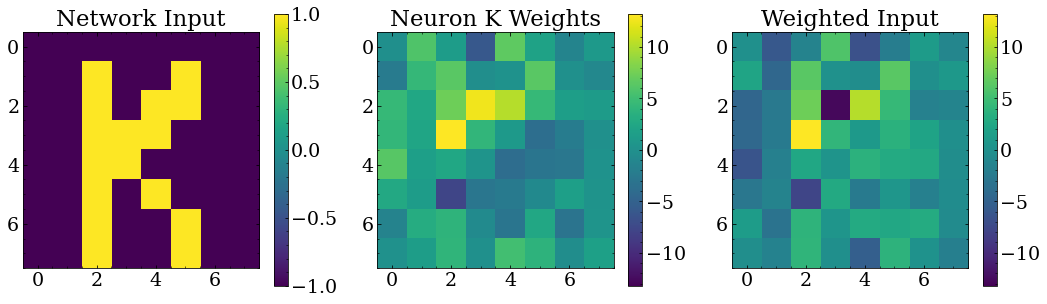

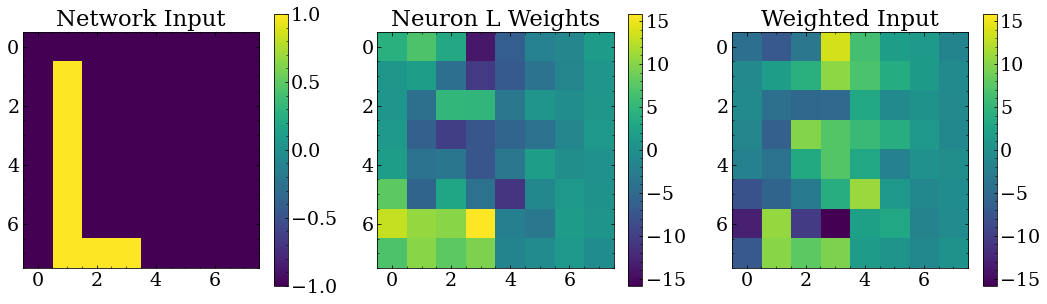

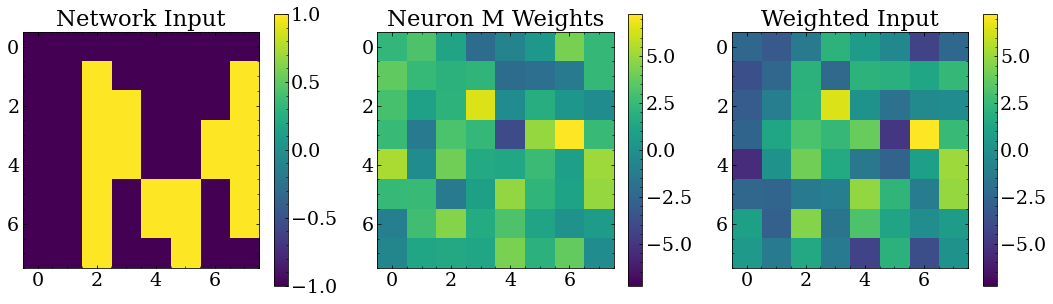

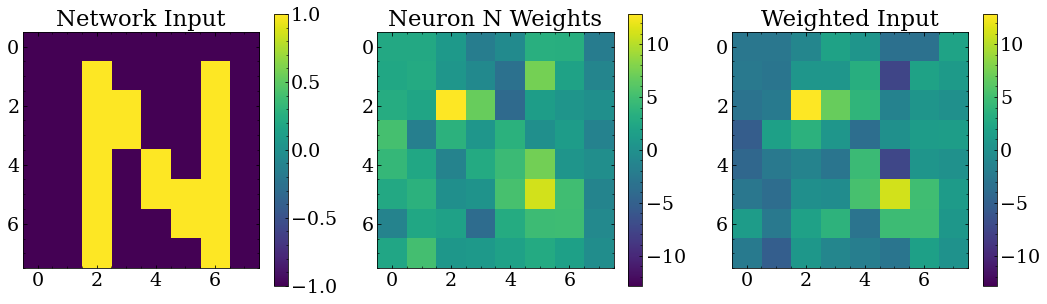

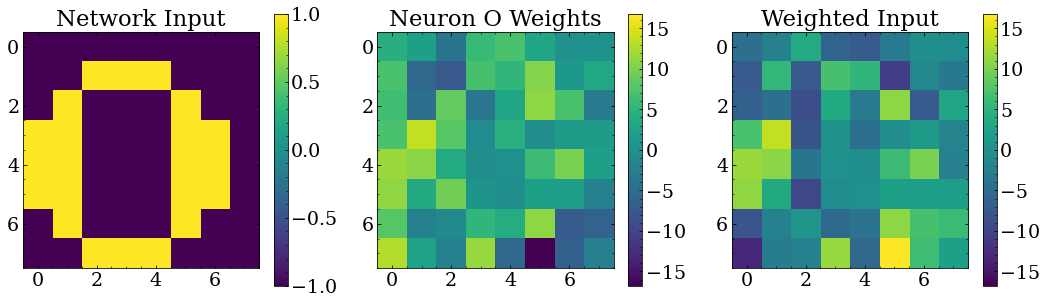

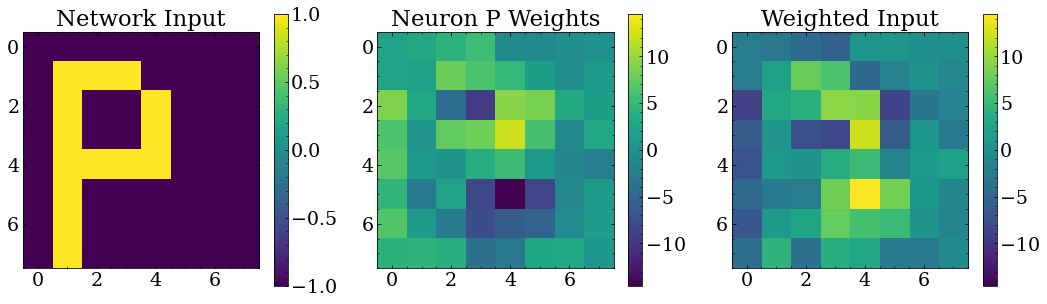

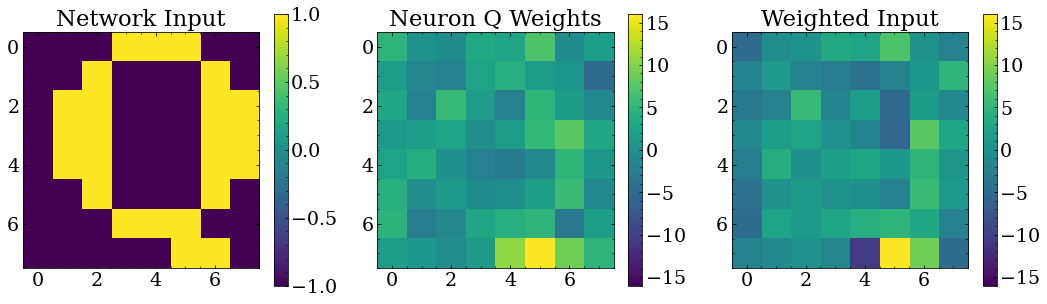

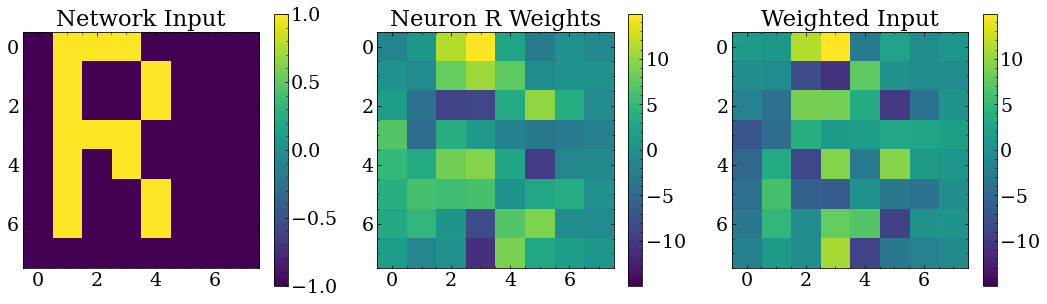

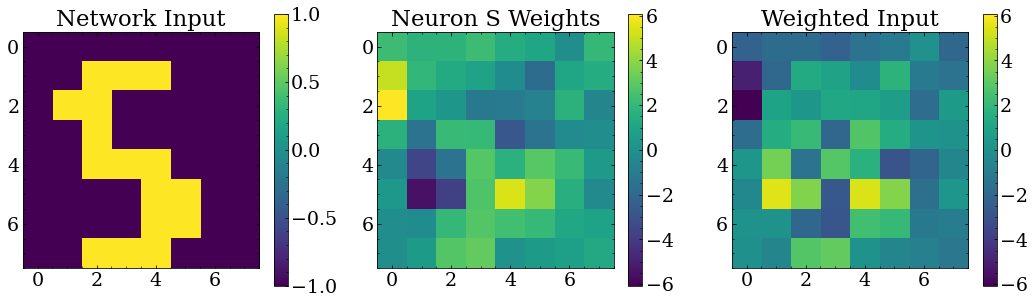

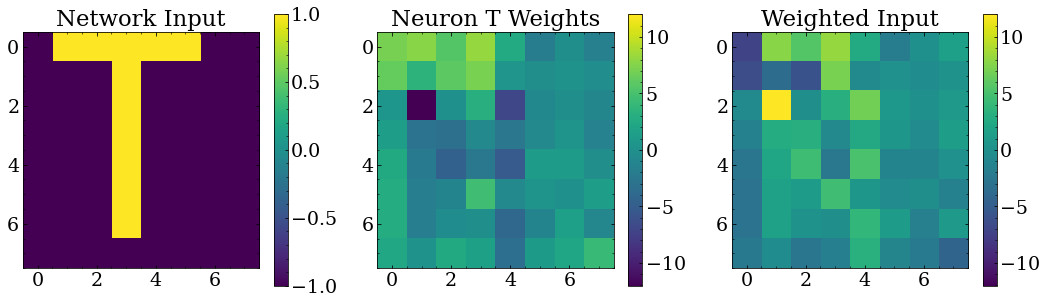

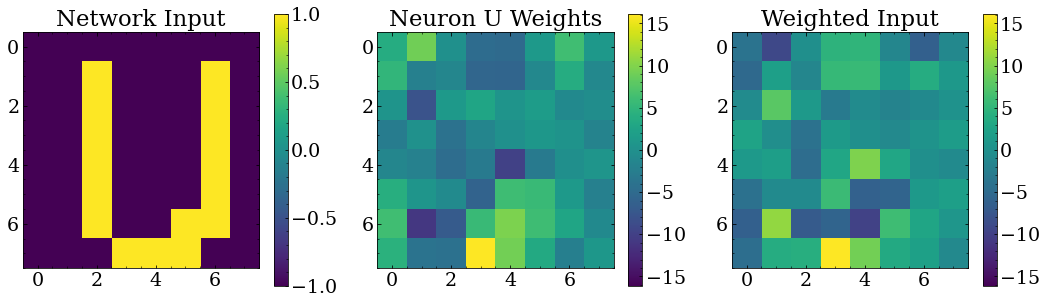

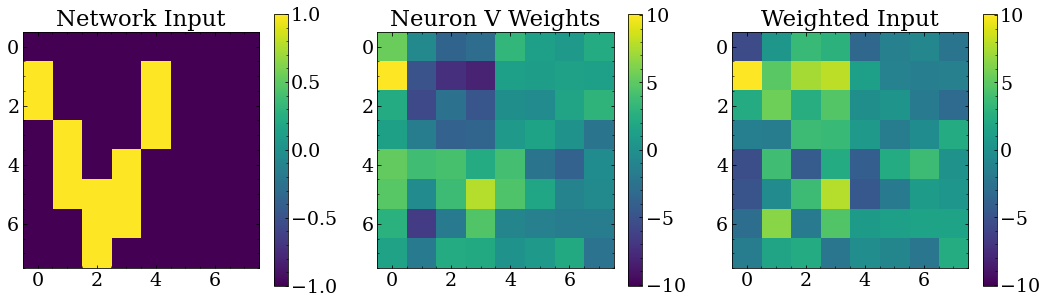

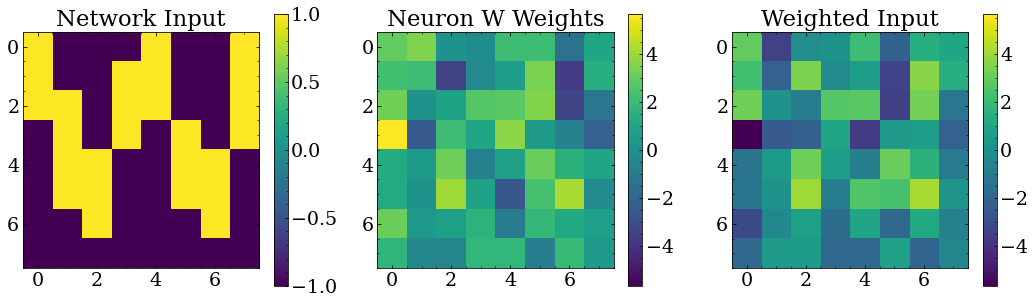

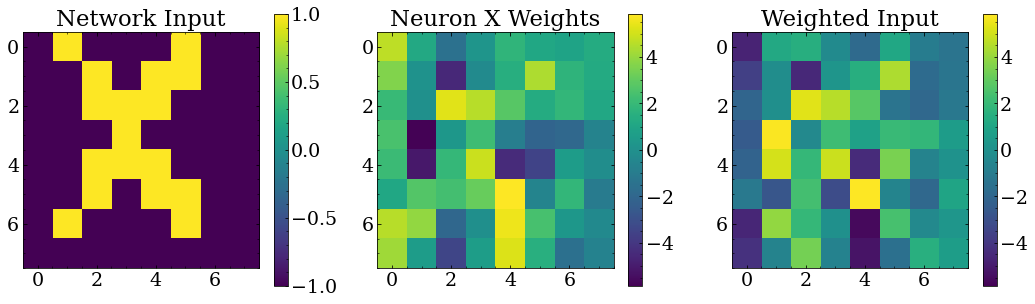

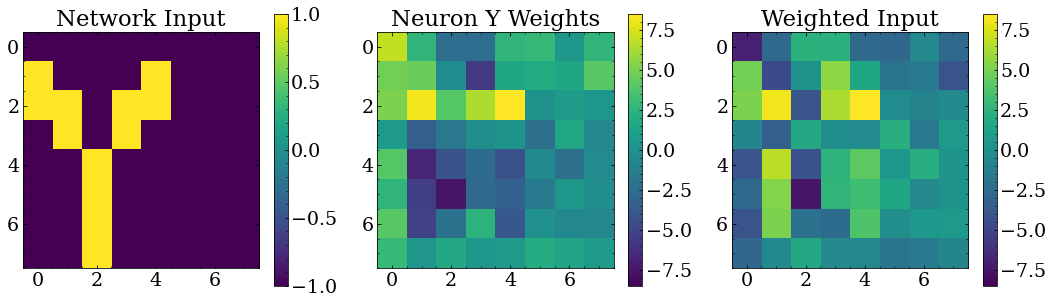

In [8]:
#To plot a simple network with only input and output neurons

from matplotlib.colors import Normalize

true_norm = Normalize(-1,1)

for i,iout in enumerate(s.outputs):
    letter = ocr_data.letters[i]
    n = s.neurons[iout]
    sort = np.argsort(n.inputs)
    test_in = ocr_data.gen_data(letter)[1]
    weights = n.weights[sort]
    img_weights = weights.reshape((8,8))
    neuron_in = img_weights*test_in
    plt.figure(figsize=[18,5])
    plt.subplot(131)
    plt.title('Network Input')
    plt.imshow(test_in,norm=true_norm)
    plt.colorbar()
    plt.subplot(132)
    plt.title('Neuron ''%s'' Weights'%letter)
    norm = np.max(np.abs(weights))
    weight_norm = Normalize(-norm,norm)
    plt.imshow(img_weights,norm=weight_norm)
    plt.colorbar()
    plt.subplot(133)
    plt.title('Weighted Input')
    norm = np.max(np.abs(neuron_in))
    weighted_norm = Normalize(-norm,norm)
    plt.imshow(neuron_in,norm=weighted_norm)
    plt.colorbar()
    plt.show()
    plt.close()